# Homework 09

In this exercise, you will demonstrate your learning of prediction, including regression and classification, using the [scikit-learn library](https://scikit-learn.org/stable/index.html). Note that scikit-learn is included in the Anaconda distribution, so you should not need to install anything new to use it.

Show your work (code or otherwise) and/or briefly explain your answers. In general you will not receive full credit for numeric answers with no accompanying work or justification (math, code, explanation). For numeric answers, we will accept answers that are very slightly off due to rounding.

In [1]:
# Run this code cell to import relevant libraries
# Please update to seaborn v0.11 or above for this assignment
# check version: print(sns.__version__)

import numpy as np
import pandas as pd
import seaborn as sns

### Question 1 (6 points; 4 autograded)
Below we import the `tips` dataset containing information from several meals in a particular restaurant. We preview the first few rows.

In [2]:
# Run but do not modify this code

tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


We are interested in modeling `tip` as a function of `total_bill` and `size`. Use scikit-learn to perform linear regression to model `tip` as a function of `total_bill` and `size`. Once you have fit the model, obtain the model predictions and compare them to the real `tip`. Compute both the MSE (mean squared error) and the $r^2$ score (the square of Pearson's correlation coefficient). Report the MSE in `q1_mse` and the $r^2$ score in `q1_r2`, both are float/np.float.

To contextualize the performance of your model, consider a baseline model which simply predicts the median `tip` for every transaction. Compute the MSE and $r^2$ scores for this baseline, and report them in `q1b_mse` and `q1b_r2`.

Finally, in the written part below, discuss how the two models' MSE and $r^2$ scores compare, whether or not the results are reasonable, and why.

Notes:
- We import the relevant code from `sklearn` for you; you can find the documentation of the functions by searching the [scikit-learn library](https://scikit-learn.org/stable/index.html).
- You do not need to split the data into train/test sets for this problem, you can just use the whole dataset.
- You can use the default LinearRegression model, i.e., you do not need to pass any parameters to the constructor.
- You may find [`np.full`](https://numpy.org/doc/stable/reference/generated/numpy.full.html) or [`np.full_like`](https://numpy.org/doc/stable/reference/generated/numpy.full_like.html) useful.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Write your code for question 1 here
# and store your results in the correct variable names for full credit

data = tips[["total_bill", "size"]].values
target = tips["tip"].values

linear_model = LinearRegression()
linear_model.fit(X=data, y=target)
predicted = linear_model.predict(data)

q1_mse = mean_squared_error(target, predicted)
q1_r2 = r2_score(target, predicted)

median = np.median(tips["tip"])
baseline = np.full(predicted.shape, median)
q1b_mse = mean_squared_error(target, baseline)
q1b_r2 = r2_score(target, baseline)

# Leave these lines here to print the result
print("Model MSE:", q1_mse, "r^2:", q1_r2)
print("Baseline MSE:", q1b_mse, "r^2:", q1b_r2)

<!-- BEGIN QUESTION -->

### Answer 1

The model's mean squared error is smaller than the baseline model's. The model's r^2 value is larger than the baseline model's. This model has better performance than the baseline model as indicated by both of these values. This is because the baseline model is much simpler than this given model.

<!-- END QUESTION -->

### Question 2 (7 points; 4 autograded)
Below we import and preview the `penguins` dataset. We have previously modeled the numerical `flipper_length_mm` feature. In this question, we will model the categorical `species` feature.

In [3]:
# Run but do not modify this code
# Only 11 penguins out of over 300 are missing any data;
# we simply drop those here
penguins = sns.load_dataset("penguins").dropna()
print(penguins.shape)
penguins.head()

(333, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


To begin, we hold out 70% of the data randomly as a test set.

In [4]:
# Run but do not modify this code

from sklearn.model_selection import train_test_split

q2_data = penguins.drop(columns=["species"])
q2_target = penguins["species"]
q2_train_data, q2_test_data, q2_train_target, q2_test_target = train_test_split(
    q2_data, q2_target, test_size=0.7, random_state=999)

Now, create and fit a logistic regression model to predict the `species` of a penguin using all of the other features in the dataset.  Note that two of the features, `island` and `sex`, are categorical. Use one hot encoding to encode these categorical features in your model and combine them with the numerical features. You should fit your model only on the training data, i.e., `q2_train_data` and `q2_train_target`.

Once you have fit your logistic regression model, make predictions for `q2_test_data` and then compute and report the `accuracy_score` of your predictions versus `q2_test_target`; put the `accuracy_score` in `q2_score` as `float`/`numpy.float64`. Also plot the confusion matrix for your predictions; see worked examples for more instructions on plotting confusion matricies. 

If everything goes right, your model should correctly distinguish a `species` from the other two (i.e., when your model predicts this species in the test data, it is always right). Put the name of this `species` in `q2_species` as a string.

The performace of your model is really good, but we do not know which feature(s) contributed the most. To find out if the categorical features help, fit a simpler version of your logistic regression model that uses only the numerical features (i.e., everything except `island` and `sex`) in the dataset as a baseline. Repeat the same process, put its `accuracy_score` in `q2b_score`, and plot its confusion matrix. In the written part below, discuss how the two models' `accuracy_score` and their confusion matricies compare, whether or not the results are reasonable, and why.

You are also welcomed to compare with a model that only uses the categorical features yourself, but that is not required in this homework.

Details:
- We import the relevant code from `sklearn` for you; you can find the documentation of the functions by searching the [scikit-learn library](https://scikit-learn.org/stable/index.html).
- If you use the default LogisticRegression model, you will likely get a warning message about convergence during fitting. We recommend you set the parameter `max_iter=1000` when calling the constructor (i.e., `LogisticRegression(max_iter=1000)` for both models. This will allow the optimization code for the model to converge.
- If your confusion matrix has distracting white lines, add a line `plt.grid(False)` after each call to `ConfusionMatrixDisplay` to remove them.

Model classification accuracy: 0.9786324786324786
Baseline classification accuracy: 0.9786324786324786


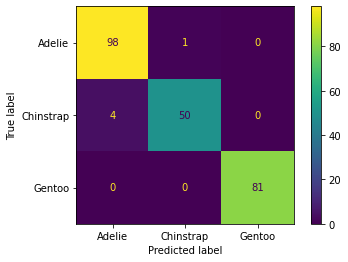

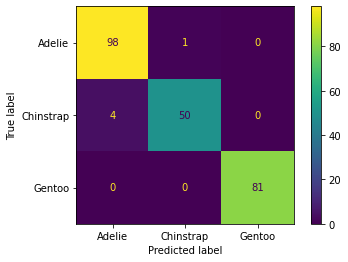

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
import matplotlib.pyplot as plt # to better format confusion matrix

# Write your code for question 2 here
q2_species = "Gentoo" # string: the species that your model correctly predicts

logistic_model = LogisticRegression(max_iter=1000)
q2_train_data_coded = np.append(OneHotEncoder().fit_transform(q2_train_data[["sex", "island"]].values).toarray(), q2_train_data[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]], axis=1)
logistic_model.fit(X=q2_train_data_coded, y=q2_train_target)
q2_test_data_coded = np.append(OneHotEncoder().fit_transform(q2_test_data[["sex", "island"]].values).toarray(), q2_test_data[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]], axis=1)
predicted = logistic_model.predict(q2_test_data_coded)

base_model = LogisticRegression(max_iter=1000)
base_data = q2_train_data[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
base_test = q2_test_data[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
base_model.fit(X=base_data, y=q2_train_target)
baseline_predicted = base_model.predict(base_test)


ConfusionMatrixDisplay.from_estimator(estimator=logistic_model, X=q2_test_data_coded, y=q2_test_target)
plt.grid(False)
ConfusionMatrixDisplay.from_estimator(estimator=base_model, X=base_test, y=q2_test_target)
plt.grid(False)


q2_score = accuracy_score(y_true=q2_test_target, y_pred=predicted)
q2b_score = accuracy_score(y_true=q2_test_target, y_pred=baseline_predicted)


# Leave these lines here to print the result
print("Model classification accuracy:", q2_score)
print("Baseline classification accuracy:", q2b_score)

<!-- BEGIN QUESTION -->

### Answer 2

The confusion matrices and their accuracy scores are the same, so the island and sex do not matter for predictions. This makes sense since the sex of an animal is not a good predictor of its species. The island of a given penguin could be related to its species, however.

<!-- END QUESTION -->

### Question 3 (7 points, 4 autograded)
An interesting observation about classification in the bag of words model is that the predictive model knows nothing about the semantics of the particular language. For this question, you will build a sentiment analysis model of casual social media messages in the Central Thai language. The data consist of raw text messages, each of which is labeled with a *sentiment*, either negative `neg`, neutral `neu`, positive `pos`, or question `q`. For example, a message that reads "I am happy you are my friend" might be labeled as positive whereas one that reads "It is raining right now" might be labeled as neutral. The dataset is already split into a training and test set. We first import and preview the first ten messages and their sentiment labels.

In [6]:
# Run but do not modify this code

# Training data
q3_train_text = pd.read_table("train_text.txt", dtype=str).squeeze("columns")
q3_train_label = pd.read_table("train_label.txt", dtype=str).squeeze("columns")

# # Held testing data
q3_test_text = pd.read_table("test_text.txt", dtype=str).squeeze("columns")
q3_test_label = pd.read_table("test_label.txt", dtype=str).squeeze("columns")

print("Training messages:", q3_train_text[:10].values, "\n")
print("Training message labels/classes:", q3_train_label[:10].values)

Training messages: ['คะ' 'อิเหี้ยออมทำกูอยากกินเอ็มเค' '😅😅😅' 'สวัสดีวันพุธ แนน อะไรนะ'
 'ก้อนขอบพระคุณมากๆนะคร้าบ ที่มาหาก้อนและชมเชยการบริการของพนักงานอีกด้วย <3 <3'
 'เน็ตควายมากกูพูดจริงเสียดายตังค์ที่ติดตั้งเน็ตโครตห่วยยิ่งดึกๆเน็ตยิ่งห่วยตอนมาติดตั้งใหม่ๆก็ดีนานๆไปเเย่ขึ้นเรื่อยๆกากกว่าเน็ตค่ายอื่นอ่ะบอกจริงไม่สนหรอกว่าจะเป็นเด็กเเล้วเม้นด่าเเบบนี้ เเต่นี้หาตังค์จ่ายค่าเน็ตมาตลอดเหนื่อยน่ะเล่นเกมส์ไปเดี่ยวก็หายกากเกินติดตั้งโปรพิเศษ100Mเเต่พอวัดดูปล่อยไม่ถึงเท่าที่ตกลงกันไว้พอโทรไปเเจ้งก็ปล่อยมาเต็มไม่กี่วันก็เหมื่อนเดิมใบเเจ้งก็มาย้อนหลัง3เดือนทุกครั้งห่วยไปน่ะบางทีโปร100M/700 กว่าบาทเเต่คุณภาพเเย่เสียดายตังค์'
 'ปากแดงกินฟรีค่ะ 😬😬' 'เหล้าเบลล์รสชาติเหี้ยสุด จะไม่แดกอีกละ'
 '🚗💨💨 ซิ่งเป็นบางเวลา ซ่อกแซ่กได้ทุกที่ << ขับสนุก ชับมัน ใช่เลย‼️ 👍🏻👍🏻 Honda Jazz>>#Jazz Naja'
 'สนใจ ฟอจูนเนอร์ สีขาวครับ'] 

Training message labels/classes: ['neu' 'neg' 'neu' 'neu' 'neu' 'neg' 'neu' 'neg' 'neu' 'pos']


Now, create and fit a Naive Bayes model that predicts the sentiment label of a message given the raw text of the message. To do so, you will need to vectorize the messages using the `CountVectorizer` and then create a `MultinomialNB` model. Both are imported for you below; you can use default values for both. You are welcome but not required to combine the steps and use a pipeline object. Fit your model on the **training data** and then make predictions of the sentiment labels for `q3_test_text`. Compute and report the `accuracy_score` of your predictions against the true `q3_test_label`, put it in `q3_score` as `float`/`numpy.float64`. 

To contextualize your model, make a baseline model that always predicts the most frequent class **in the training data**. You can implement this either by yourself or using [`DummyClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). Compute and report the `accuracy_score` of the baseline in `q3b_score`. 

In the written part below, compare the performances of the two models, state whether or not the results are reasonable, and why. Specifically, elaborate why the accuracy score of the baseline model is a lot higher than 1/4. (Hint: you may find [`value_counts`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) helpful.)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier

# Write your code for question 3 here

vectorize = CountVectorizer()
train_x = vectorize.fit_transform(q3_train_text)
test_x = vectorize.transform(q3_test_text)
multi_naivebayes = MultinomialNB()
multi_naivebayes.fit(train_x, q3_train_label)
predict = multi_naivebayes.predict(test_x)
baseline = DummyClassifier(strategy = 'most_frequent')
baseline.fit(train_x, q3_train_label)
base_predict = baseline.predict (test_x)
q3_score = accuracy_score(q3_test_label, predict) # float: test classification accuracy score of the model
q3b_score = accuracy_score(q3_test_label, base_predict) # float: test classification accuracy score of the



# Leave these lines here to print the result
print("Model test classification accuracy:", q3_score)
print("Baseline test classification accuracy:", q3b_score)
print(q3_test_label.value_counts())

Model test classification accuracy: 0.6333707444818556
Baseline test classification accuracy: 0.5447063224841002
neu    1456
neg     682
pos     478
q        57
Name: neg, dtype: int64


<!-- BEGIN QUESTION -->

### Answer 3

This data is reasonable because using value_counts results in the most common being neutral, and since it forms such a large part of total labels, predicting neutral each time results in an accuracy greater than 1/4.

<!-- END QUESTION -->

### Question 4 (6 points, 4 autograded)
In addition to natural language processing, machine learning techniques for preditive modeling can be very effective for analyzing raw image data. In this question, we consider the task of modeling images of handwritten digits. We pose this as a classification task: We want to predict the digit (0, 1, 2, ..., 9) as a function of an 8 by 8 pixel grayscale image of a digit.

To begin, we import and preview the data below. `data` has 64 features, each of which is an integer between 0 and 15 corresponding to a particular pixel intensity value for one of the 64 pixels in the 8 by 8 image. `target` contains the actual digits corresponding to each particular image.

The first image corresponds to digit:  0 

First image with pixels flattened out: 
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.] 

First image rearranged to be 8 x 8: 
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]] 

Visualizing first several images:


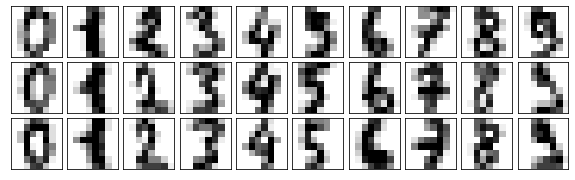

In [8]:
# Run but do not modify this code

import matplotlib.pyplot as plt

# Importing data
from sklearn.datasets import load_digits
digits = load_digits()
q4_data = digits["data"]
q4_target = digits["target"]

# Previewing data
print("The first image corresponds to digit: ", q4_target[0], "\n")
print("First image with pixels flattened out: \n", q4_data[0], "\n")
print("First image rearranged to be 8 x 8: \n", q4_data[0].reshape((8,8)), "\n")
print("Visualizing first several images:")

# Visualizing digits
fig, axes = plt.subplots(3, 10, figsize=(10, 3),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')

We first split the data into training and test sets as usual.

In [9]:
# Run but do not modify this code

q4_train_data, q4_test_data, q4_train_target, q4_test_target = train_test_split(
    q4_data, q4_target, test_size=0.3, random_state=2)

Now, use a k-nearest neighbors classifier for your model that predicts the underlying digit given an image. We import the relevant `KNeighborsClassifier` for you below. Recall that an important hyperparameter of a k-nearest neighbor model is k, or the `n_neighbors` parameter to the `KNeighborsClassifier()` constructor. 

Use 5-fold cross validation to search for the best value of `n_neighbors` in validation on the training set from among possible values between 2 and 20. You can either do so using `cross_validate` to check each possible setting directly, or you can use a `GridSearchCV` to perform the search automatically during fitting. If you search manually, take the average of the five scores for 5-fold cross validation, for each value. If you use `GridSearchCV`, note that the `GridSearchCV` object can itself fit and predict, and that you can get the optimal setting after fitting with `.best_params_`. Report the optimal value of `n_neighbors` in `q4_n` as `int`/`numpy.int64`.

When you have fit your model with the optimal `n_neighbors` value on the training data, make predictions for the test data. Compute and report the `accuracy_score` of your model in testing and report it in `q4_score` as `float`/`numpy.float64`.

Next, fit a Naive Bayes model (using `MultinomialNB` and the default setting) on the training data and predict the class of the test data.  Compute its `accuracy_score` and put it in `q4b_score`. In the written part, compare the two `accuracy_score`, discuss whether or not they are reasonable, and why.

In [10]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Write your code for question 4 here

validator = {'n_neighbors': [i for i in range (2,20)]}
auto_search = GridSearchCV(KNeighborsClassifier(), validator)
auto_search.fit(q4_train_data, q4_train_target)
q4_n = auto_search.best_params_.get('n_neighbors')

# int: n neighbors
model = KNeighborsClassifier(n_neighbors = q4_n)
model.fit (q4_train_data, q4_train_target)
predict = model.predict(q4_test_data)


baseline = MultinomialNB()
baseline.fit(q4_train_data, q4_train_target)
baseline_predict = baseline.predict(q4_test_data)

q4_score = accuracy_score(q4_test_target, predict)
q4b_score = accuracy_score(q4_test_target, baseline_predict)

# Leave these lines here to print the result
print("Optimal n_neighors:", q4_n)
print("Accuracy on testing data:", q4_score)
print("Accuracy of baseline:", q4b_score)

Optimal n_neighors: 5
Accuracy on testing data: 0.9740740740740741
Accuracy of baseline: 0.8796296296296297


<!-- BEGIN QUESTION -->

### Answer 4

KNeighbors is more accurate than naivebays.

<!-- END QUESTION -->

<!-- END QUESTION -->

## Submitting

You should make sure any code that you write to answer the questions is included in this notebook. We recommend you go to the Kernel option and choose \"Restart & Run All.\" Double check that your entire notebook runs correctly and generates the expected output. Finally, make sure to save your work (timestamp at the top tells you the last checkpoint and whether there are unsaved changes). When you finish, submit your assignment at [Gradescope](http://gradescope.com/).